# Credit Card Fraud Detection Using Machine Learning & Python
The dataset contains real bank transactions of the year 2013

Starting with importing libraries and importing the dataset (creditcard.csv)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../input/creditcardfraud/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


---
### Data Understanding and Pre-processing

We will look at the number of fradulent and legitimate transactions for getting a rough estimate about the percentage of fradulent cases. Even we will plot a correlation matrix so as to find any features showing strong correlation between them.

We will also check for any null values in the dataset

<AxesSubplot:xlabel='Class', ylabel='count'>

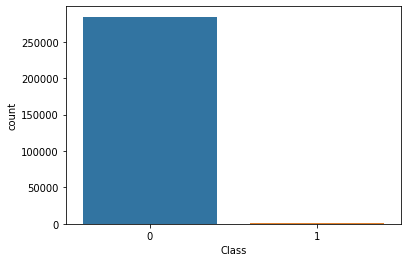

In [3]:
sns.countplot(data=data, x='Class')

<AxesSubplot:>

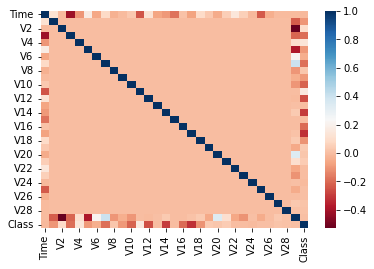

In [4]:
sns.heatmap(data.corr(), cmap="RdBu")

In [5]:
total_transactions = data.shape[0]
legitimate_transactions = data[data["Class"] == 0].shape[0]
fraud_transactions = data[data["Class"] == 1].shape[0]

print("Total Transactions = ", total_transactions)
print("Legitimate Transactions = ", legitimate_transactions)
print("Fraud Transactions = ", fraud_transactions)

Total Transactions =  284807
Legitimate Transactions =  284315
Fraud Transactions =  492


In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
data.isna().values.any()

False

---
While having a look at the maximum and minimum of Amount, I found that the difference was huge which can result in outlier formations causing deviations in results and predictions. So here I considered that using StandardScaler would be a good way to fix it.

In [9]:
data["Amount"].min(), data["Amount"].max()

(0.0, 25691.16)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
amount = data["Amount"].values
data["Amount"] =sc.fit_transform(amount.reshape(-1, 1))

In [11]:
data.drop(["Time"], axis = 1, inplace = True)

In [12]:
data.shape

(284807, 30)

In [13]:
data.drop_duplicates(inplace=True)
data.shape

(275663, 30)

So around 9150 duplicate transactions were removed from the dataset.


---
We will define the data and target sets and also make a 70:30 train test split.

In [14]:
from sklearn.model_selection import train_test_split

x = data.drop('Class', axis=1).values
y = data['Class'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [15]:
# import pip
# pip.main(['install', 'xgboost'])

---
Majorly I know 5 classification algorithms so I have implimented all the 5 algorithms, trained them and then compared their accuracy scores and F1 scores of the top performing algorithms. Which inturn will lead to a single most accurate algorithm.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

logreg = LogisticRegression().fit(x_train, y_train)
svm_model = SVC().fit(x_train, y_train)
nb_model = GaussianNB().fit(x_train, y_train)
rfc_model = RandomForestClassifier().fit(x_train, y_train)
xgb_model = XGBClassifier().fit(x_train, y_train)

In [17]:
#Accuracy scores of respective models
from sklearn.metrics import accuracy_score

print("Logistic Regression Accuracy Score = ",accuracy_score(y_test, logreg.predict(x_test)))
print("SVM Classifier Accuracy Score = ",accuracy_score(y_test, svm_model.predict(x_test)))
print("Naive Baye's Accuracy Score = ",accuracy_score(y_test, nb_model.predict(x_test)))
print("RandomForestClassifier Accuracy Score = ",accuracy_score(y_test, rfc_model.predict(x_test)))
print("XGB Classifier Accuracy Score = ",accuracy_score(y_test, xgb_model.predict(x_test)))

Logistic Regression Accuracy Score =  0.9990568205177813
SVM Classifier Accuracy Score =  0.9993470295892333
Naive Baye's Accuracy Score =  0.9774120606053277
RandomForestClassifier Accuracy Score =  0.9994558579910277
XGB Classifier Accuracy Score =  0.9995405023035345


In [18]:
from sklearn.metrics import f1_score
print("SVM CLassifier F1 Score = ", f1_score(y_test, svm_model.predict(x_test)))
print("RandomForestClassifier F1 Score = ", f1_score(y_test, rfc_model.predict(x_test)))
print("XGB Classifier F1 Score = ", f1_score(y_test, xgb_model.predict(x_test)))

SVM CLassifier F1 Score =  0.7768595041322313
RandomForestClassifier F1 Score =  0.823529411764706
XGB Classifier F1 Score =  0.8527131782945736


On comparing the accuracy scores we found that XGB Classifier has is the most accurate classifier and then verifying it with comparison of F1-scores, we can conclude that XGB-Classifier is the best for our case.

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = xgb_model.predict(x_test)
print(confusion_matrix(y_test, y_pred, labels=[1,0]))
print(classification_report(y_test, y_pred, labels=[1,0]))

[[  110    35]
 [    3 82551]]
              precision    recall  f1-score   support

           1       0.97      0.76      0.85       145
           0       1.00      1.00      1.00     82554

    accuracy                           1.00     82699
   macro avg       0.99      0.88      0.93     82699
weighted avg       1.00      1.00      1.00     82699



The good thing that we can notice from the confusion matrix is that our model is not overfit.